# Pandas avancé

## Groupby

La mécanique du groupby suit une logique dite de `split-apply-combine`

<img src="media/groupby.png" width="500"/>

#### Étape 1 : Split

Dans cette première étape, les données contenues dans un objet Pandas, qu'il s'agisse d'une Series, d'un DataFrame ou autre, sont divisées en groupes en fonction d'une ou plusieurs clés que vous fournissez. La division est effectuée sur un axe particulier de l'objet. Par exemple, un DataFrame peut être groupé sur ses lignes (axe=0) ou sur ses colonnes (axe=1).

In [2]:
import pandas as pd

# Création d'un DataFrame
data = {'Clé': ['A', 'B', 'A', 'B', 'A'],
        'Valeur': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Groupement par la colonne 'Clé'
groupes = df.groupby('Clé')
groupes.head()

,Clé,Valeur
0,A,1
1,B,2
2,A,3
3,B,4
4,A,5


#### Étape 2 : Apply

Une fois que les données sont divisées en groupes, une fonction est appliquée à chaque groupe, produisant une nouvelle valeur. Cette fonction peut être une agrégation statistique (comme la somme, la moyenne, etc.) ou une opération personnalisée.

In [9]:
# Calcul de la somme pour chaque groupe
somme_par_groupe = groupes.sum()

#### Étape 3 : Combine

Enfin, les résultats de toutes ces applications de fonction sont combinés dans un objet de résultat. La forme de l'objet résultant dépendra généralement de ce qui est fait avec les données.

In [10]:
print(somme_par_groupe)

     Valeur
Clé        
A         9
B         6


### _Exercice 1_

Vous avez le fichier suivant : 

In [3]:
df_ventes_aout = pd.read_excel("s3_data/August.xlsx")
df_ventes_aout.head()

,transaction_id,store,status,transaction_date,plan,contract_type,amount
0,8d2b0582,Chicago,ACTIVE,2019-08-01,Silver,NEW,14.25
1,61e3773d,Chicago,ACTIVE,2019-08-01,Gold,NEW,19.35
2,52b3f422,New York,ACTIVE,2019-08-01,Bronze,NEW,12.20
3,ae0498f2,Chicago,ACTIVE,2019-08-01,Silver,NEW,14.25
4,7d1f5d57,New York,ACTIVE,2019-08-01,Silver,NEW,14.25


* Calculez le montant total des transactions pour chaque magasin.

In [49]:
# Groupement par magasin et calcul de la somme des montants
split = df_ventes_aout.groupby('store')
print(split.head())

    transaction_id          store  status transaction_date    plan  \
0         8d2b0582        Chicago  ACTIVE       2019-08-01  Silver   
1         61e3773d        Chicago  ACTIVE       2019-08-01    Gold   
2         52b3f422       New York  ACTIVE       2019-08-01  Bronze   
3         ae0498f2        Chicago  ACTIVE       2019-08-01  Silver   
4         7d1f5d57       New York  ACTIVE       2019-08-01  Silver   
5         c03d6d26         Boston  ACTIVE       2019-08-01  Bronze   
6         8204d03f  San Francisco  ACTIVE       2019-08-01    Gold   
7         83cad5b1        Chicago  ACTIVE       2019-08-01  Silver   
8         adca93e5       New York  ACTIVE       2019-08-01  Bronze   
9         cea04b87  San Francisco  ACTIVE       2019-08-01  Silver   
10        2ad9e2e4  San Francisco  ACTIVE       2019-08-01  Silver   
11        5138d879  San Francisco  ACTIVE       2019-08-01  Silver   
12        58241dce  San Francisco  ACTIVE       2019-08-01  Silver   
13        2f05a6ed  

In [50]:
apply_combine = split['amount'].sum()
print(apply_combine)

store
Boston           12239.70
Chicago          24662.75
Las Vegas         6335.05
New York         36491.60
San Francisco    36895.10
Washington DC     6729.15
Name: amount, dtype: float64


* Calculez le nombre de transactions pour chaque type de plan.

In [54]:
resultat_size = df_ventes_aout.groupby('plan').size()
print(resultat_size)

plan
Bronze    2513
Gold      1665
Silver    4244
dtype: int64


* Calculer le montant moyen par date 

In [56]:
# Conversion de la colonne 'transaction_date' en format de date
df_ventes_aout['transaction_date'] = pd.to_datetime(df_ventes_aout['transaction_date'])

# Groupement par date de transaction et calcul de la moyenne des montants
resultat_date = df_ventes_aout.groupby('transaction_date')['amount'].mean()
print(resultat_date)

transaction_date
2019-08-01    14.611311
2019-08-02    14.978571
2019-08-05    14.604637
2019-08-06    14.683787
2019-08-07    14.506489
2019-08-08    14.758438
2019-08-09    14.656608
2019-08-12    14.548656
2019-08-13    14.246469
2019-08-14    14.661330
2019-08-15    14.849044
2019-08-16    14.660253
2019-08-19    14.642623
2019-08-20    14.776323
2019-08-21    14.485112
2019-08-22    14.797059
2019-08-23    14.769023
2019-08-26    14.593733
2019-08-27    14.636631
2019-08-28    14.703887
2019-08-29    14.562360
2019-08-30    14.449724
Name: amount, dtype: float64


* Calculez le montant total des transactions pour chaque combinaison de magasin et de plan.

In [58]:
# Groupement par magasin et plan, puis somme des montants
resultat_magasin_plan = df_ventes_aout.groupby(['store', 'plan'])['amount'].sum()
print(resultat_magasin_plan)


store          plan  
Boston         Bronze     3184.20
               Gold       2999.25
               Silver     6056.25
Chicago        Bronze     5648.60
               Gold       6559.65
               Silver    12454.50
Las Vegas      Bronze     1744.60
               Gold       1683.45
               Silver     2907.00
New York       Bronze     9235.40
               Gold       9229.95
               Silver    18026.25
San Francisco  Bronze     9198.80
               Gold       9926.55
               Silver    17769.75
Washington DC  Bronze     1647.00
               Gold       1818.90
               Silver     3263.25
Name: amount, dtype: float64


## Groupby avancé : la méthode `agg`

La méthode permet d'appliquer des fonctions d'agrégation à vos groupes, telles que la somme, la moyenne, le comptage, etc. Mais elle permet surtout d'appliquer plusieurs fonctions à la fois et créer de nouvelles colonnes avec les résultats agrégés.

Par exemple, avec une seule ligne de code, vous pouvez :

```python
import pandas as pd

# Charger les données
data = pd.read_csv("data.csv")

# Regrouper par une colonne et appliquer plusieurs fonctions d'agrégation
resultats = data.groupby('categorie').agg({
    'colonne1': 'sum',           # Somme de la colonne1
    'colonne2': ['mean', 'max']  # Moyenne et maximum de la colonne2
})

print(resultats)
```

### Exercice 2

Sur le fichier de ventes aout, écrivez un code en utilisant `groupby` et `agg` qui va permettre de connaitre la somme et la moyenne des transactions ainsi que la date de la première transaction pour chaque magasin.


In [53]:
final = df_ventes_aout.groupby('store').agg({"amount":[sum,"mean"],"transaction_date":lambda x: x.unique().tolist()[0]})
print(final.head())

                 amount            transaction_date
                    sum       mean         <lambda>
store                                              
Boston         12239.70  14.553746       2019-08-01
Chicago        24662.75  14.715245       2019-08-01
Las Vegas       6335.05  14.596889       2019-08-01
New York       36491.60  14.602481       2019-08-01
San Francisco  36895.10  14.675855       2019-08-01


## Matplotlib avec pandas

### Créer des line graphs

Commençons par créer un graphique simple pour visualiser des données. Voici un exemple de code qui trace un graphique linéaire.

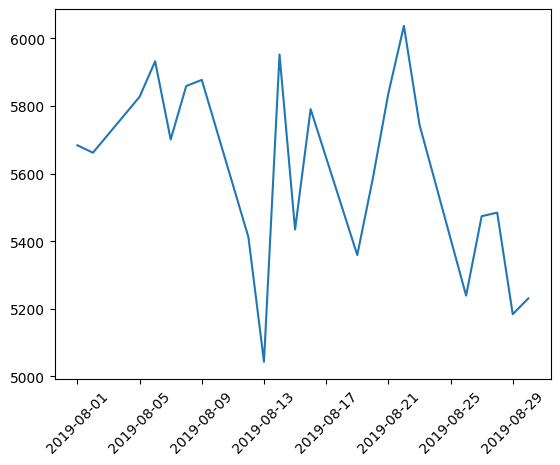

In [8]:
import matplotlib.pyplot as plt

# Données à visualiser
x = df_ventes_aout['transaction_date'].unique()
y = df_ventes_aout.groupby('transaction_date')['amount'].sum()

# Création du graphique
plt.plot(x, y)
plt.xticks(rotation=45)


# Affichage du graphique
plt.show()


### Créer des bar graphs

Les diagrammes en barres sont utilisés pour représenter des données catégoriques avec des barres de longueurs proportionnelles aux valeurs qu'elles représentent.

## Travailler avec des séries temporelles

Pourquoi travailler avec des séries temporelles sur Python et non sur Excel ? 

1. A cause du volume de données

Si vous travaillez avec des prix d'actions intrajournaliners vous traitez souvent avec des centaines de milliers d'enregistrements - par action et par jour. Python, en revanche, n'a pas de telles limitations de taille de données, vous permettant de manipuler des séries temporelles de grande taille sans aucun problème de performance.

2. Limite sur la manipulation des dates et du temps

Excel présente des limites importantes en ce qui concerne la manipulation des dates et des heures, qui sont l'épine dorsale des séries temporelles. L'absence de prise en charge des fuseaux horaires et un format de nombre limité aux millisecondes en sont quelques exemples. En revanche, pandas, une bibliothèque Python populaire pour la manipulation de données, prend en charge les fuseaux horaires et utilise le type de données datetime64[ns] de NumPy, offrant une résolution allant jusqu'aux nanosecondes.

3. Parce qu'Excel ne permet pas de faire des analyses de séries temporelles de base

Il manque à Excel de fonctionnalités de base pour travailler efficacement avec des données de séries temporelles. Par exemple, la transformation d'une série temporelle quotidienne en une série temporelle mensuelle n'est pas simple sur Excel et quasi immédiate sur Excel. 

### Manipulations de base